In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter

pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
project_dir = globals()["_dh"][0]
sys.path.append(os.path.normpath(os.path.join(project_dir, "..", "..", "..", "..")))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_PATH,
)
from experiments.utils.parser import Parser

In [2]:
series = 4
experiment_id = 2
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(NODE_PROFILING_RESULTS_PATH, "series", str(series))
loader = Parser(series_path=series_path, config_key_mapper=config_key_mapper)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
print(results.columns)
key_config_df

Index(['experiment_id', 'client_to_model_avg',
       'client_to_model_p99', 'client_to_model_p50',
       'client_to_model_var', 'client_to_model_max',
       'client_to_model_min', 'model_latencies_avg',
       'model_latencies_p99', 'model_latencies_p50', 'model_latencies_var',
       'model_latencies_max', 'model_latencies_min',
       'model_to_client_avg', 'model_to_client_p99',
       'model_to_client_p50', 'model_to_client_var',
       'model_to_client_max', 'model_to_client_min',
       'start_time', 'end_time', 'duration', 'timeout_count',
       'cpu_usage_count_avg', 'cpu_usage_count_p99', 'cpu_usage_count_p50',
       'cpu_usage_count_var', 'cpu_usage_count_max', 'cpu_usage_count_min',
       'cpu_usage_rate_avg', 'cpu_usage_rate_p99', 'cpu_usage_rate_p50',
       'cpu_usage_rate_var', 'cpu_usage_rate_max', 'cpu_usage_rate_min',
       'cpu_throttled_count_avg', 'cpu_throttled_count_p99',
       'cpu_throttled_count_p50', 'cpu_throttled_count_var',
       'cpu_throttled_co

,experiment_id,pipeline_name,node_name,model_variant,cpu_request,memory_request,max_batch_size,max_batch_time,load,load_duration,series,series_meta,replicas
0,1,5-paper-video,yolo,yolov5n,4,40Gi,1,1,1,60,4,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
1,2,5-paper-video,yolo,yolov5n,4,40Gi,1,1,1,60,4,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
2,3,5-paper-video,yolo,yolov5n,8,40Gi,1,1,1,60,4,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
3,4,5-paper-video,yolo,yolov5n,8,40Gi,1,1,1,60,4,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
4,5,5-paper-video,yolo,yolov5n,16,40Gi,1,1,1,60,4,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
5,6,5-paper-video,yolo,yolov5n,16,40Gi,1,1,1,60,4,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
6,7,5-paper-video,yolo,yolov5n,32,40Gi,1,1,1,60,4,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
7,8,5-paper-video,yolo,yolov5n,32,40Gi,1,1,1,60,4,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
8,4,5-paper-video,yolo,yolov5s,4,40Gi,1,1,1,60,4,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
9,10,5-paper-video,yolo,yolov5s,4,40Gi,1,1,1,60,4,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1


In [3]:
configs = loader.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config)

File name: 0.yaml
{   'cpu_request': ['4', '8', '16', '32'],
    'data_type': 'image',
    'max_batch_size': ['1'],
    'max_batch_time': ['1'],
    'memory_request': ['40Gi'],
    'model_variants': ['yolov5n', 'yolov5m', 'yolov5x'],
    'node_name': 'yolo',
    'pipeline_name': '5-paper-video',
    'repetition': 3,
    'replicas': [1],
    'series': 4,
    'series_meta': 'checking effect of CPU allocation change, \\n cpu type: '
                   'Intel(R) Xeon(R) Gold 6126 CPU @ 2.60GHz',
    'workload_config': {'load_duration': 60, 'loads_to_test': [1]},
    'workload_type': 'static'}


Text(0, 0.5, 'Latency (seconds)')

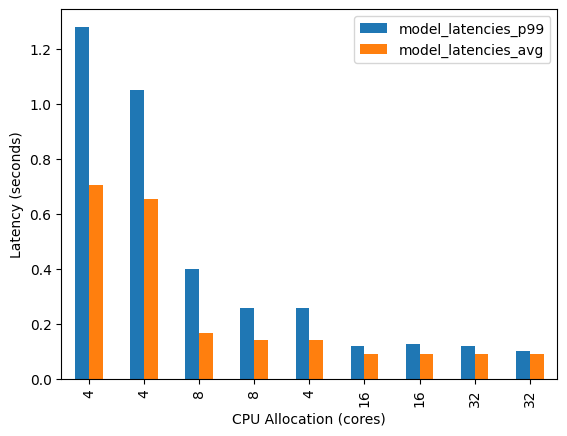

In [4]:
model_variant = "yolov5n"
experiment_ids = key_config_df[key_config_df["model_variant"] == model_variant][
    "experiment_id"
].tolist()
metadata_columns = ["model_variant", "cpu_request", "memory_request"]
results_columns = ["model_latencies_p99", "cpu_usage_count_avg", "model_latencies_avg"]
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns,
)
ax = output.plot.bar(x="cpu_request", y=["model_latencies_p99", "model_latencies_avg"])
ax.set_xlabel("CPU Allocation (cores)")
ax.set_ylabel("Latency (seconds)")

<AxesSubplot: xlabel='cpu_request'>

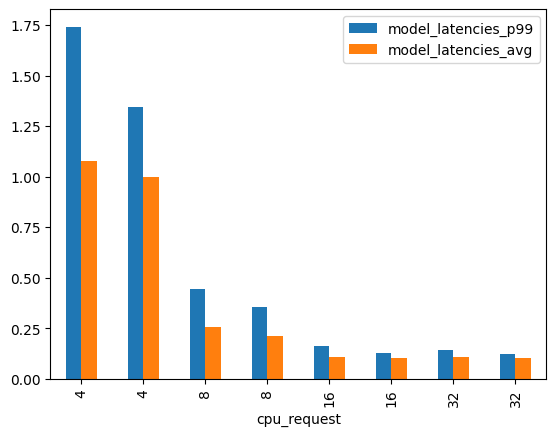

In [5]:
model_variant = "yolov5s"
experiment_ids = key_config_df[key_config_df["model_variant"] == "yolov5s"][
    "experiment_id"
].tolist()
metadata_columns = ["model_variant", "cpu_request", "memory_request"]
results_columns = ["model_latencies_p99", "cpu_usage_count_avg", "model_latencies_avg"]
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns,
)
output.plot.bar(x="cpu_request", y=["model_latencies_p99", "model_latencies_avg"])

<AxesSubplot: xlabel='cpu_request'>

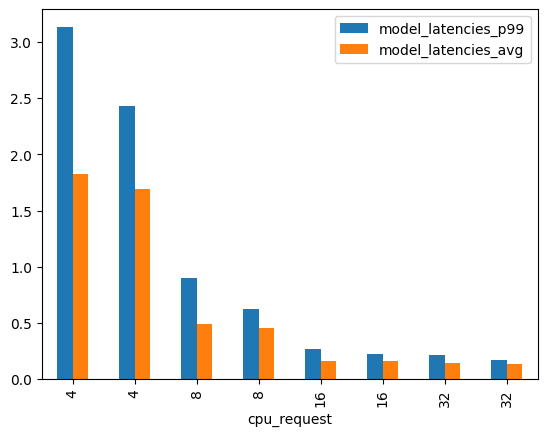

In [6]:
model_variant = "yolov5m"
experiment_ids = key_config_df[key_config_df["model_variant"] == model_variant][
    "experiment_id"
].tolist()
metadata_columns = ["model_variant", "cpu_request", "memory_request"]
results_columns = ["model_latencies_p99", "cpu_usage_count_avg", "model_latencies_avg"]
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns,
)
output.plot.bar(x="cpu_request", y=["model_latencies_p99", "model_latencies_avg"])

<AxesSubplot: xlabel='cpu_request'>

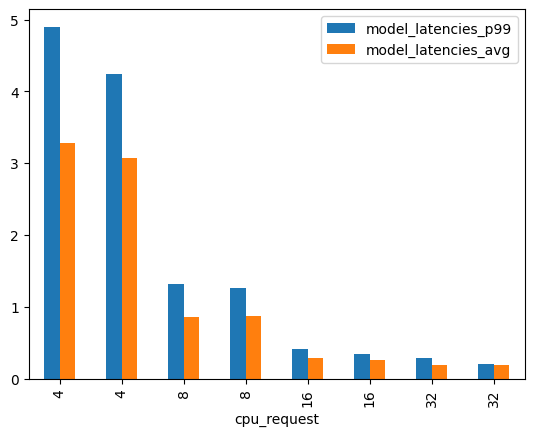

In [7]:
model_variant = "yolov5l"
experiment_ids = key_config_df[key_config_df["model_variant"] == model_variant][
    "experiment_id"
].tolist()
metadata_columns = ["model_variant", "cpu_request", "memory_request"]
results_columns = ["model_latencies_p99", "cpu_usage_count_avg", "model_latencies_avg"]
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns,
)
output.plot.bar(x="cpu_request", y=["model_latencies_p99", "model_latencies_avg"])

<AxesSubplot: xlabel='cpu_request'>

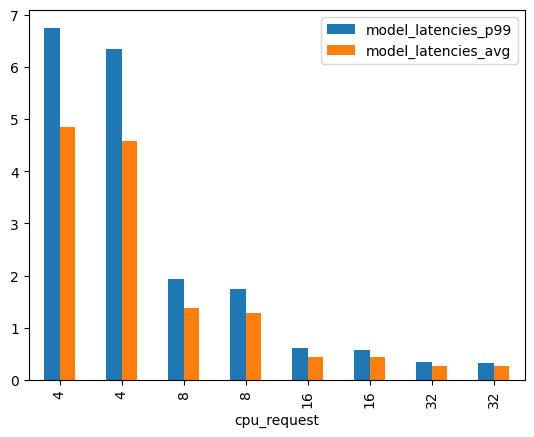

In [8]:
model_variant = "yolov5x"
experiment_ids = key_config_df[key_config_df["model_variant"] == model_variant][
    "experiment_id"
].tolist()
metadata_columns = ["model_variant", "cpu_request", "memory_request"]
results_columns = ["model_latencies_p99", "cpu_usage_count_avg", "model_latencies_avg"]
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns,
)
output.plot.bar(x="cpu_request", y=["model_latencies_p99", "model_latencies_avg"])

,model_variant,cpu_request,memory_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,yolov5n,4,40Gi,1.280459,147.187640,0.706152
1,yolov5n,4,40Gi,1.051915,476.397809,0.654445
2,yolov5s,4,40Gi,1.740355,207.672431,1.076355
3,yolov5s,4,40Gi,1.345965,616.058483,0.999929
4,yolov5m,4,40Gi,3.134969,312.521735,1.826445
5,yolov5m,4,40Gi,2.429610,890.354848,1.696065
6,yolov5l,4,40Gi,4.897667,591.653271,3.284612
7,yolov5l,4,40Gi,4.246319,1510.785671,3.074649
8,yolov5x,4,40Gi,6.747281,835.496368,4.840108
9,yolov5x,4,40Gi,6.338735,2119.145713,4.583296


<AxesSubplot: xlabel='model_variant'>

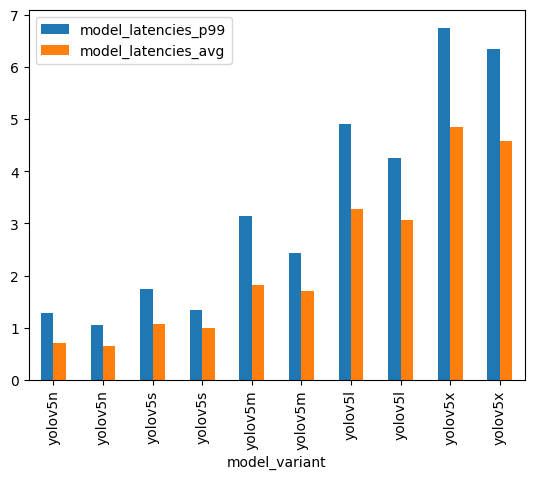

In [9]:
cpu_request = 4
experiment_ids = key_config_df[key_config_df["cpu_request"] == cpu_request][
    "experiment_id"
].tolist()
metadata_columns = ["model_variant", "cpu_request", "memory_request"]
results_columns = ["model_latencies_p99", "cpu_usage_count_avg", "model_latencies_avg"]
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns,
)
display(output)
output.plot.bar(x="model_variant", y=["model_latencies_p99", "model_latencies_avg"])

,model_variant,memory_usage_max
0,yolov5n,1.995764e+09
1,yolov5n,1.977598e+09
2,yolov5s,2.294649e+09
3,yolov5s,2.429428e+09
4,yolov5m,2.702655e+09
5,yolov5m,2.538136e+09
6,yolov5l,2.899980e+09
7,yolov5l,3.068838e+09
8,yolov5x,3.751141e+09
9,yolov5x,3.632370e+09


<AxesSubplot: xlabel='model_variant'>

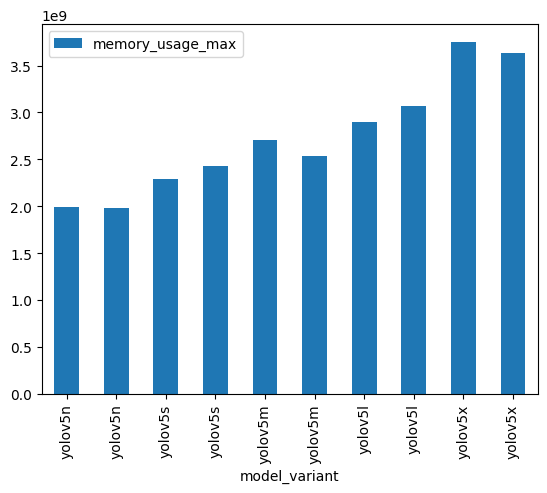

In [10]:
cpu_request = 4
experiment_ids = key_config_df[key_config_df["cpu_request"] == cpu_request][
    "experiment_id"
].tolist()
metadata_columns = ["model_variant"]
results_columns = ["memory_usage_max"]
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns,
)
display(output)
output.plot.bar(x="model_variant", y=results_columns)